In [1]:
import os

os.mkdir("dataset")
os.mkdir(os.path.join("dataset", "NORMAL"))
os.mkdir(os.path.join("dataset", "PNEUMONIA"))

In [2]:
import shutil

data=["/kaggle/input/chest-xray-pneumonia/chest_xray/train",
     "/kaggle/input/chest-xray-pneumonia/chest_xray/val",
     "/kaggle/input/chest-xray-pneumonia/chest_xray/test"]

for f1 in data:
    folder1=os.listdir(f1)
    for f2 in folder1:
        if f2 =="NORMAL":
            folder2=os.listdir(os.path.join(f1,f2))
            for file1 in folder2:
                shutil.copy(os.path.join(f1,f2,file1),"/kaggle/working/dataset/NORMAL")
        else:
            folder3=os.listdir(os.path.join(f1,f2))
            for file1 in folder3:
                
                shutil.copy(os.path.join(f1,f2,file1),"/kaggle/working/dataset/PNEUMONIA")
            

In [3]:
import glob
pneumonia_images= glob.glob("/kaggle/working/dataset/PNEUMONIA/*.jpeg")
normal_images= glob.glob("/kaggle/working/dataset/NORMAL/*.jpeg")
total_images=len(pneumonia_images)+len(normal_images)
percent_pneumonia=round(len(pneumonia_images)/total_images *100,2)
percent_normal=round(len(normal_images)/total_images *100,2)
print(f"The total number of images is :{total_images}\n\
while the number of pneumonia images is: {len(pneumonia_images)} with percent {percent_pneumonia}\n\
and the number of normal images is: {len(normal_images)} with percent {percent_normal}")

The total number of images is :5856
while the number of pneumonia images is: 4273 with percent 72.97
and the number of normal images is: 1583 with percent 27.03


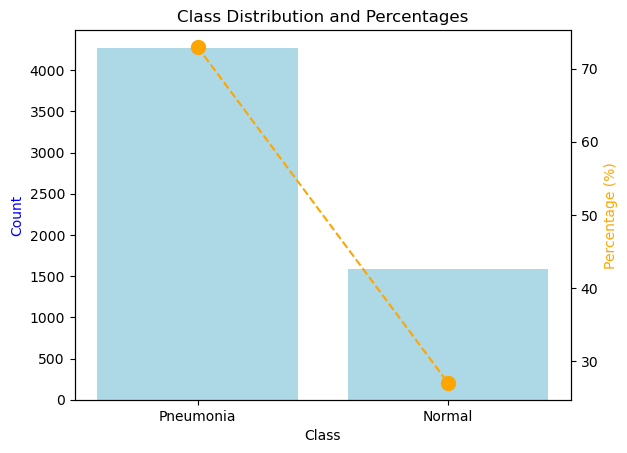

In [4]:
import matplotlib.pyplot as plt

class_labels = ['Pneumonia', 'Normal']
class_counts = [len(pneumonia_images), len(normal_images)]
class_percentages = [percent_pneumonia, percent_normal]

fig, ax1 = plt.subplots()
ax1.bar(class_labels, class_counts, color='lightblue')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count', color='b')
ax1.set_title('Class Distribution and Percentages')

ax2 = ax1.twinx()
ax2.plot(class_labels, class_percentages, marker='o', color='orange', linestyle='--', markersize=10)
ax2.set_ylabel('Percentage (%)', color='orange')

plt.show()

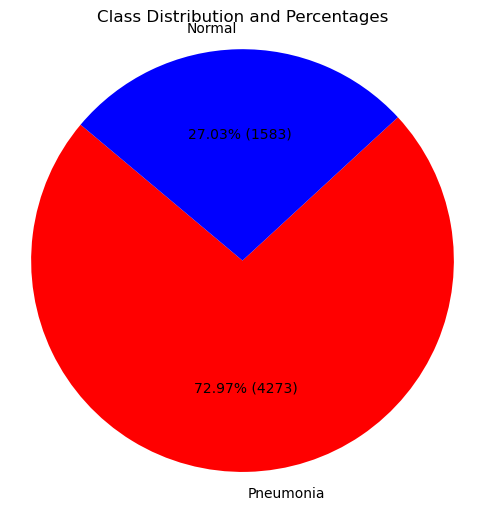

In [5]:
class_labels = ['Pneumonia', 'Normal']
class_counts = [len(pneumonia_images), len(normal_images)]
class_percentages = [percent_pneumonia, percent_normal]

colors = ['red', 'blue']
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct=lambda p:f'{p:.2f}% ({int(p*sum(class_counts)/100):d})', 
        startangle=140, colors=colors)
plt.axis('equal')
plt.title('Class Distribution and Percentages')

plt.show()

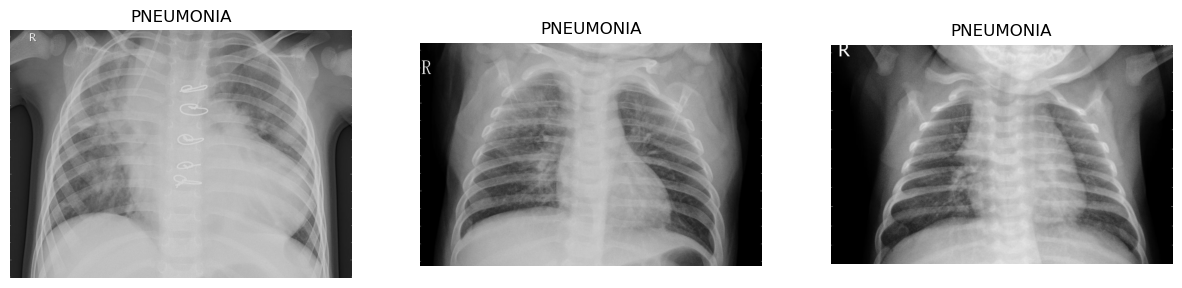

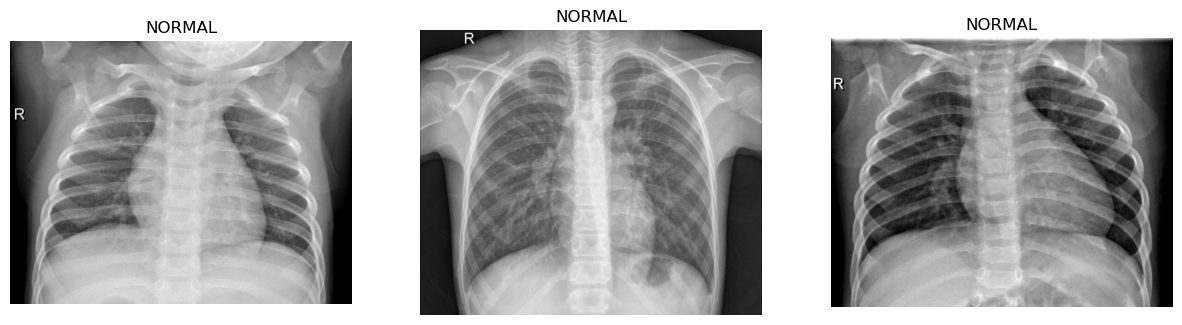

In [6]:
import random
import cv2
import numpy as np

def show_images(folder_name, plt_title):
    plt.figure(figsize=(15,10))
    for i in range(3):
        image_path = random.choice(folder_name)
        img = cv2.imread(image_path)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(plt_title)
        plt.axis('off')
    plt.show()
show_images(pneumonia_images, 'PNEUMONIA')
show_images(normal_images, 'NORMAL')

In [7]:
train_data_dir = '/kaggle/working/dataset'
valid_data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
img_width, img_height = 224,224
num_classes = 2

In [8]:
from tensorflow.keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense

base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

base_model.layers[0].trainable = False

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

94765736/94765736 [==============================] - 0s 0us/step


In [9]:
model = Sequential()
model.add(base_model)
model.add(Dense(num_classes, activation='softmax'))

In [10]:
import tensorflow

train_generator = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size = 10,
    image_size =(224,224),
    shuffle = True,
    seed =123,
    validation_split =0.15,
    subset ='training'

    )
validation_generator = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size = 10,
    image_size =(224,224),
    shuffle = True,
    seed =123,
    validation_split =0.15,
    subset ='validation'

    )

Found 5856 files belonging to 2 classes.
Using 4978 files for training.
Found 5856 files belonging to 2 classes.
Using 878 files for validation.


In [11]:
model.compile(optimizer="sgd", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 10

History2=model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/10
498/498 [==============================] - 62s 83ms/step - loss: 0.1470 - accuracy: 0.9442 - val_loss: 0.3846 - val_accuracy: 0.8383
Epoch 2/10
498/498 [==============================] - 40s 79ms/step - loss: 0.0591 - accuracy: 0.9787 - val_loss: 0.1252 - val_accuracy: 0.9499
Epoch 3/10
498/498 [==============================] - 39s 79ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0823 - val_accuracy: 0.9715
Epo

In [12]:
History2.history

{'loss': [0.1470121145248413,
  0.059119269251823425,
  0.021016353741288185,
  0.011787910014390945,
  0.005414590705186129,
  0.0024426390882581472,
  0.0033965599723160267,
  0.001906736521050334,
  0.00293816183693707,
  0.002017102437093854],
 'accuracy': [0.9441542625427246,
  0.9787063002586365,
  0.9935716986656189,
  0.995781421661377,
  0.999196469783783,
  0.999397337436676,
  0.9989956021308899,
  0.9997991323471069,
  0.999196469783783,
  0.9989956021308899],
 'val_loss': [0.38464152812957764,
  0.12517274916172028,
  0.08227457106113434,
  0.13755741715431213,
  0.08245125412940979,
  0.09068387746810913,
  0.0779351145029068,
  0.20440265536308289,
  0.07423049211502075,
  0.08331595361232758],
 'val_accuracy': [0.8382688164710999,
  0.9498860836029053,
  0.9715262055397034,
  0.9521639943122864,
  0.9772209525108337,
  0.9772209525108337,
  0.9726651310920715,
  0.9533029794692993,
  0.9783599376678467,
  0.980637788772583]}

In [22]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [23]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [24]:
import tensorflow as tf

path = "/kaggle/input/pnuemonia/person1010_virus_1695.jpeg"

img = tf.keras.preprocessing.image.load_img(path)
img = tf.keras.preprocessing.image.img_to_array(img)
img =  tf.image.resize(img,(224,224))

img = tf.reshape(img,[1,224,224,3])
img.shape

TensorShape([1, 224, 224, 3])

In [25]:
prediction = loaded_model.predict(img)
predict_class = numpy.argmax(prediction)
if predict_class == 0:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 1s 891ms/step
Pneumonia
